In [1]:
from conv_net_model_deep3 import *
import os
import logging
import matplotlib.pyplot as plt

D:\Softwares\Anaconda\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
predict_year = 2013
config = Config()
# RUN_NAME = "" # DON'T FORGET TO CHANGE THIS!!!
config.save_path = os.path.expanduser('D:\itd\out')

assert(len(os.listdir(config.save_path)) <= 1)
logging.basicConfig(filename=os.path.join(config.save_path, str(predict_year)+'.log'),level=logging.DEBUG)

    

In [3]:
filename = os.path.expanduser('D:\itd\histdata\data_output_full_histogram_all_full' + '.npz')
content = np.load(filename)
image_all = content['output_image']
yield_all = content['output_yield']
year_all = content['output_year']
locations_all = content['output_locations']
index_all = content['output_index']

In [4]:
year_all 

array([2015., 2014., 2013., 2012., 2011., 2010., 2009., 2007., 2006.,
       2005., 2004., 2003., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2016.,
       2015., 2014., 2013., 2012., 2011., 2010., 2009., 2007., 2006.,
       2005., 2004., 2003., 2016., 2008., 2008., 2008., 2008., 2007.,
       2007., 2007., 2006., 2006., 2006., 2005., 2005., 2005., 2005.,
       2005., 2005., 2005., 2005., 2005., 2004., 2004., 2004., 2004.,
       2004., 2004., 2004., 2004., 2004., 2004., 2003., 2003., 2003.,
       2003., 2003., 2003., 2003., 2016., 2016., 2016., 2016., 2016.,
       2016., 2016., 2016., 2016., 2016., 2015., 2015., 2015., 2015.,
       2015., 2015., 2015., 2015., 2014., 2014., 2014., 2014., 2014.,
       2014., 2014., 2014., 2013., 2013., 2013., 2013., 2013., 2013.,
       2013., 2013., 2012., 2012., 2012., 2012., 2012., 2012., 2012.,
       2012., 2011., 2011., 2011., 2011., 2011., 2011., 2011., 2011.,
       2010., 2010.,

In [5]:
list_delete=[]
for i in range(image_all.shape[0]):
    if np.sum(image_all[i,:,:,:])<=287:
        if year_all[i]<2016:
            list_delete.append(i)
image_all=np.delete(image_all,list_delete,0)
yield_all=np.delete(yield_all,list_delete,0)
year_all = np.delete(year_all,list_delete, 0)
locations_all = np.delete(locations_all, list_delete, 0)
index_all = np.delete(index_all, list_delete, 0)

In [6]:
image_all.shape

(197, 32, 32, 9)

In [7]:
year_all

array([2015., 2014., 2013., 2012., 2011., 2010., 2009., 2007., 2006.,
       2005., 2004., 2003., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2016.,
       2015., 2014., 2013., 2012., 2011., 2010., 2009., 2007., 2006.,
       2005., 2004., 2003., 2016., 2008., 2008., 2008., 2008., 2007.,
       2007., 2007., 2006., 2006., 2006., 2005., 2005., 2005., 2005.,
       2005., 2005., 2005., 2005., 2005., 2004., 2004., 2004., 2004.,
       2004., 2004., 2004., 2004., 2004., 2004., 2003., 2003., 2003.,
       2003., 2003., 2003., 2016., 2016., 2016., 2016., 2016., 2016.,
       2016., 2016., 2016., 2016., 2015., 2015., 2015., 2015., 2015.,
       2015., 2015., 2014., 2014., 2014., 2014., 2014., 2014., 2014.,
       2014., 2013., 2013., 2013., 2013., 2013., 2013., 2013., 2013.,
       2012., 2012., 2012., 2012., 2012., 2012., 2012., 2012., 2011.,
       2011., 2011., 2011., 2011., 2011., 2010., 2010., 2010., 2010.,
       2010., 2010.,

In [8]:
image_all[0,:,1,1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00138985, 0.00069493, 0.        , 0.00347464,
       0.00138985, 0.00347464, 0.00833912, 0.01528839, 0.03266157,
       0.03822099, 0.05559416, 0.05072967, 0.07783183, 0.10145935,
       0.09103544, 0.10771369, 0.10076442, 0.08061154, 0.07505212,
       0.04239055, 0.04169562, 0.02015288, 0.01945796, 0.01042391,
       0.01042391, 0.00972898])

In [9]:
# split into train and validate
index_train = np.nonzero(year_all < predict_year)[0]
index_validate = np.nonzero(year_all == predict_year)[0]
print ('train size',index_train.shape[0])
print ('validate size',index_validate.shape[0])

train size 142
validate size 11


In [10]:
 # calc train image mean (for each band), and then detract (broadcast)
image_mean=np.mean(image_all[index_train],(0,1,2))
image_all = image_all - image_mean

image_validate=image_all[index_validate]
yield_validate=yield_all[index_validate]

In [11]:
model= NeuralModel(config,'net')

In [12]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.22)
    # Launch the graph.
config1 = tf.ConfigProto()
config1.gpu_options.allow_growth = True
sess = tf.Session(config = config1)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.initialize_all_variables())
summary_train_loss = []
summary_eval_loss = []
summary_RMSE = []
summary_ME = []

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [13]:
train_loss=0
val_loss=0
val_prediction = 0
val_deviation = np.zeros([config.B])

In [14]:
RMSE_min = 100

In [15]:
index_train_batch = np.random.choice(index_train,size=config.B)
image_train_batch = image_all[index_train_batch,:,0:config.H,:]
yield_train_batch = yield_all[index_train_batch]
year_train_batch = year_all[index_train_batch,np.newaxis]
index_validate_batch = np.random.choice(index_validate, size=config.B)

In [16]:
index_train_batch

array([ 74, 136,  38,  17, 134, 186, 132, 166, 123, 175, 179,  32,  16,
       184,  58, 177,  64,  49, 183, 136, 155, 111,  53,   5, 111, 171,
        72, 138, 143, 131, 181, 153], dtype=int64)

In [17]:
image_train_batch.shape

(32, 32, 32, 9)

In [18]:
image_train_batch[0,:,1,1]

array([-0.03125   , -0.03125   , -0.03125   , -0.03125   , -0.03125   ,
       -0.03125   , -0.03125   , -0.03125   , -0.03125   , -0.03125   ,
       -0.03125   , -0.03125   , -0.03125   , -0.03125   , -0.03125   ,
       -0.03125   , -0.0241578 ,  0.07513298,  0.00421099,  0.01130319,
        0.09640957,  0.06804078,  0.11059397,  0.05385638,  0.05385638,
        0.06094858,  0.01130319,  0.05385638, -0.0170656 , -0.00288121,
       -0.03125   , -0.0241578 ])

In [19]:
yield_train_batch

array([31. , 31. , 36.7, 37.3, 46. , 38. , 44. , 20. , 15.9, 41. , 42. ,
       32. , 42.8, 34. , 33. , 41. , 33. , 25.6, 38. , 31. , 35. , 41. ,
       32. , 36.1, 41. , 41. , 30. , 27. , 31. , 41. , 33. , 36. ])

In [30]:
_, train_loss = sess.run([model.train_op, model.loss_err], feed_dict={
                model.x:image_train_batch,
                model.y:yield_train_batch,
                model.lr:config.lr,
                model.keep_prob: config.drop_out
                })

In [21]:
train_loss

19616.941

In [22]:
val_loss,fc6,W,B = sess.run([model.loss_err,model.fc6,model.dense_W,model.dense_B], feed_dict={
                    model.x: image_all[index_validate_batch, :, 0:config.H, :],
                    model.y: yield_all[index_validate_batch],
                    model.keep_prob: 1
                })

In [23]:
print ('predict year'+str(predict_year)+'step'+str(0),train_loss,val_loss,config.lr)

predict year2013step0 19616.941 164471.77 0.001


In [24]:
pred = []
real = []
j=0
real_temp = yield_validate[j * config.B:(j + 1) * config.B]
pred_temp= sess.run(model.logits, feed_dict={
                    model.x: image_validate[j * config.B:(j + 1) * config.B,:,0:config.H,:],
                    model.y: yield_validate[j * config.B:(j + 1) * config.B],
                    model.keep_prob: 1
                        })
pred.append(pred_temp)
real.append(real_temp)

In [25]:
RMSE=np.sqrt(np.mean((np.array(pred)-np.array(real))**2))

In [26]:
RMSE

101.30316541821968

In [15]:
saver=tf.train.Saver()

In [18]:
for i in range(5000):
            if i==3500:
                config.lr/=10
            if i==20000:
                config.lr/=10
            index_train_batch = np.random.choice(index_train,size=config.B)
            image_train_batch = image_all[index_train_batch,:,0:config.H,:]
            yield_train_batch = yield_all[index_train_batch]
            year_train_batch = year_all[index_train_batch,np.newaxis]

            index_validate_batch = np.random.choice(index_validate, size=config.B)

            _, train_loss = sess.run([model.train_op, model.loss_err], feed_dict={
                model.x:image_train_batch,
                model.y:yield_train_batch,
                model.lr:config.lr,
                model.keep_prob: config.drop_out
                })
            if i%200 == 0:
                val_loss,fc6,W,B = sess.run([model.loss_err,model.fc6,model.dense_W,model.dense_B], feed_dict={
                    model.x: image_all[index_validate_batch, :, 0:config.H, :],
                    model.y: yield_all[index_validate_batch],
                    model.keep_prob: 1
                })
                print ('predict year'+str(predict_year)+'step'+str(i),train_loss,val_loss,config.lr)
                logging.info('predict year %d step %d %f %f %f',predict_year,i,train_loss,val_loss,config.lr)
            if i%200 == 0:
                # do validation
                pred = []
                real = []
                size = image_validate.shape[0]//config.B
                if(size==0):
                    size=1
                for j in range(size):
                    real_temp = yield_validate[j * config.B:(j + 1) * config.B]
                    pred_temp= sess.run(model.logits, feed_dict={
                        model.x: image_validate[j * config.B:(j + 1) * config.B,:,0:config.H,:],
                        model.y: yield_validate[j * config.B:(j + 1) * config.B],
                        model.keep_prob: 1
                        })
                    pred.append(pred_temp)
                    real.append(real_temp)
                pred=np.concatenate([pred])
                real=np.concatenate([real])
                RMSE=np.sqrt(np.mean((pred-real)**2))
                ME=np.mean(pred-real)

                if RMSE<RMSE_min:
                    RMSE_min=RMSE
                    save_path = saver.save(sess, config.save_path + str(predict_year)+'CNN_model.ckpt')
                    print('save in file: %s' % save_path)
                    np.savez(config.save_path+str(predict_year)+'result.npz',
                        summary_train_loss=summary_train_loss,summary_eval_loss=summary_eval_loss,
                        summary_RMSE=summary_RMSE,summary_ME=summary_RMSE)

                print ('Validation set','RMSE',RMSE,'ME',ME,'RMSE_min',RMSE_min)
                logging.info('Validation set RMSE %f ME %f RMSE_min %f',RMSE,ME,RMSE_min)
            
                summary_train_loss.append(train_loss)
                summary_eval_loss.append(val_loss)
                summary_RMSE.append(RMSE)
                summary_ME.append(ME)

predict year2013step0 100.763466 163.92975 1e-05
Validation set RMSE 2.805825766209656 ME 0.8001588301225145 RMSE_min 2.683654315535271
predict year2013step200 83.58195 164.2929 1e-05
Validation set RMSE 2.8499058616606585 ME 1.0979399941184307 RMSE_min 2.683654315535271
predict year2013step400 75.52741 85.94996 1e-05
Validation set RMSE 2.8409030948966922 ME 0.8381691672585231 RMSE_min 2.683654315535271
predict year2013step600 56.63776 157.67982 1e-05
Validation set RMSE 2.868084547364545 ME 1.0555524652654478 RMSE_min 2.683654315535271
predict year2013step800 80.13116 176.04782 1e-05
Validation set RMSE 2.7821915869305904 ME 0.8382603732022376 RMSE_min 2.683654315535271
predict year2013step1000 107.05173 134.38527 1e-05
Validation set RMSE 2.883369127000504 ME 1.08020546653054 RMSE_min 2.683654315535271
predict year2013step1200 86.39363 107.07555 1e-05
Validation set RMSE 2.912985700027459 ME 0.9386316472833811 RMSE_min 2.683654315535271
predict year2013step1400 90.96188 103.20139 1e

In [19]:
RMSE_min

2.683654315535271

In [20]:
pred

array([[41.370277, 38.24044 , 40.959614, 41.612934, 42.45163 , 36.087296,
        44.24543 , 47.097122, 38.024837, 38.969944, 44.73243 ]],
      dtype=float32)

In [21]:
real

array([[39.8, 41.4, 39.3, 35.1, 42.4, 38.3, 41.9, 47.9, 38.7, 36.2, 40.7]])

In [21]:
save_path = saver.save(sess, config.save_path + str(predict_year)+'CNN_model.ckpt')

In [22]:
pred_out = []
real_out = []
feature_out = []
year_out = []
locations_out =[]
index_out = []

In [23]:
for i in range(image_all.shape[0] // config.B):
            feature,pred = sess.run(
                [model.fc6,model.logits], feed_dict={
                model.x: image_all[i * config.B:(i + 1) * config.B,:,0:config.H,:],
                model.y: yield_all[i * config.B:(i + 1) * config.B],
                model.keep_prob:1
            })
            real = yield_all[i * config.B:(i + 1) * config.B]

            pred_out.append(pred)
            real_out.append(real)
            feature_out.append(feature)
            year_out.append(year_all[i * config.B:(i + 1) * config.B])
            locations_out.append(locations_all[i * config.B:(i + 1) * config.B])
            index_out.append(index_all[i * config.B:(i + 1) * config.B])
            
            weight_out, b_out = sess.run(
            [model.dense_W, model.dense_B], feed_dict={
                model.x: image_all[0 * config.B:(0 + 1) * config.B, :, 0:config.H, :],
                model.y: yield_all[0 * config.B:(0 + 1) * config.B],
                model.keep_prob: 1
            })

In [24]:
pred_out

[array([38.416817, 44.04178 , 40.112965, 40.190956, 39.223873, 37.58135 ,
        46.20689 , 19.68512 , 32.56505 , 28.69617 , 42.522945, 33.029797,
        19.947264, 38.896854, 43.189774, 40.064617, 41.247993, 36.68723 ,
        27.902065, 42.30913 , 27.94298 , 23.15949 , 31.121845, 28.108515,
        42.555084, 41.058407, 19.510141, 36.585564, 42.826965, 41.329205,
        42.582253, 36.71404 ], dtype=float32),
 array([35.23529 , 48.429424, 34.246162, 40.03376 , 36.623886, 48.255196,
        40.901134, 28.414864, 32.115074, 39.77547 , 44.145714, 46.016056,
        29.244528, 29.71772 , 30.369688, 30.746843, 29.318802, 27.902588,
        36.879063, 34.19135 , 32.232105, 36.263798, 26.074245, 36.2111  ,
        37.879353, 31.267405, 31.134897, 31.531685, 36.750355, 46.03046 ,
        38.795902, 39.069843], dtype=float32),
 array([41.623585, 40.260117, 34.03728 , 39.892963, 35.70279 , 27.842989,
        35.644276, 36.183666, 26.787432, 36.18605 , 33.4963  , 19.633886,
        25.298563,

In [25]:
pred_out=np.concatenate(pred_out)
real_out=np.concatenate(real_out)
feature_out=np.concatenate(feature_out)
year_out=np.concatenate(year_out)
locations_out=np.concatenate(locations_out)
index_out=np.concatenate(index_out)

In [26]:
path = config.save_path + str(predict_year)+'result_prediction.npz'
np.savez(path,
            pred_out=pred_out,real_out=real_out,feature_out=feature_out,
            year_out=year_out,locations_out=locations_out,weight_out=weight_out,b_out=b_out,index_out=index_out)
np.savez(config.save_path+str(predict_year)+'result.npz',
                        summary_train_loss=summary_train_loss,summary_eval_loss=summary_eval_loss,
                        summary_RMSE=summary_RMSE,summary_ME=summary_ME)

In [27]:
npzfile = np.load(config.save_path+str(predict_year)+'result.npz')
summary_train_loss=npzfile['summary_train_loss']
summary_eval_loss=npzfile['summary_eval_loss']
summary_RMSE = npzfile['summary_RMSE']
summary_ME = npzfile['summary_ME']

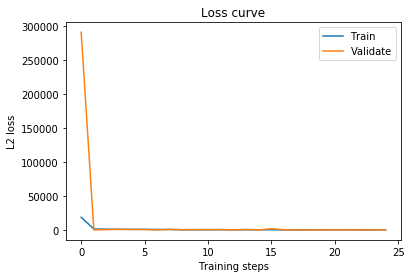

In [28]:
plt.plot(range(len(summary_train_loss)), summary_train_loss)
plt.plot(range(len(summary_eval_loss)), summary_eval_loss)
plt.xlabel('Training steps')
plt.ylabel('L2 loss')
plt.title('Loss curve')
plt.legend(['Train', 'Validate'])
plt.show()

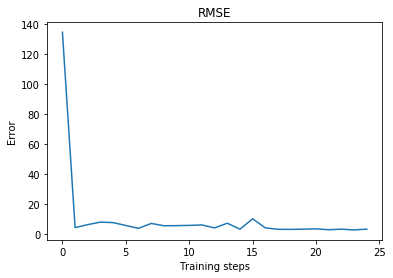

In [30]:
plt.plot(range(len(summary_RMSE)), summary_RMSE)
        # plt.plot(range(len(summary_ME)), summary_ME)
plt.xlabel('Training steps')
plt.ylabel('Error')
plt.title('RMSE')
        # plt.legend(['RMSE', 'ME'])
plt.show()

In [ ]:
plt.plot(range(len(summary_ME)), summary_ME)
plt.xlabel('Training steps')
plt.ylabel('Error')
plt.title('ME')
        # plt.legend(['RMSE', 'ME'])
plt.show()